<a href="https://colab.research.google.com/github/akhtarKhan8050/machine-learning-notes/blob/main/recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [24]:
destinations_df=pd.read_csv("/content/Expanded_Destinations.csv")



In [6]:
reviews_df=pd.read_csv("/content/Final_Updated_Expanded_Reviews.csv")
userhistory_df=pd.read_csv("/content/Final_Updated_Expanded_UserHistory.csv")
users_df=pd.read_csv("/content/Final_Updated_Expanded_Users.csv")


#Merge Datasets

In [26]:
#merge reviews with destinations on "DestinationID"
reviews_destination=pd.merge(reviews_df,destinations_df,on="DestinationID")
reviews_destination

,ReviewID,DestinationID,UserID,Rating,ReviewText,Name,State,Type,Popularity,BestTimeToVisit
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb
2,3,927,12,2,A historical wonder,Goa Beaches,Goa,Beach,7.741214,Nov-Mar
3,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar
4,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar
...,...,...,...,...,...,...,...,...,...,...
994,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb
995,996,140,140,3,A historical wonder,Leh Ladakh,Jammu and Kashmir,Adventure,8.907808,Apr-Jun
996,997,823,858,5,Incredible monument!,Jaipur City,Rajasthan,City,8.501225,Oct-Mar
997,998,279,839,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,7.841207,Sep-Mar


In [8]:
#merge the result with user history on 'UserID'
reviews_destination_history=pd.merge(reviews_destination,userhistory_df,on="UserID")
reviews_destination_history

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4


In [9]:
#merge  the results with users on "UserID"
df=pd.merge(reviews_destination_history,users_df,on="UserID")
df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,HistoryID,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,79,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,834,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,998,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,202,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,331,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,138,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,643,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,454,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,556,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2


#visualization

<ipython-input-27-13049d86fcb0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Popularity',x='Name',data=destinations_df.sort_values(by='Popularity',ascending=False),palette='viridis')


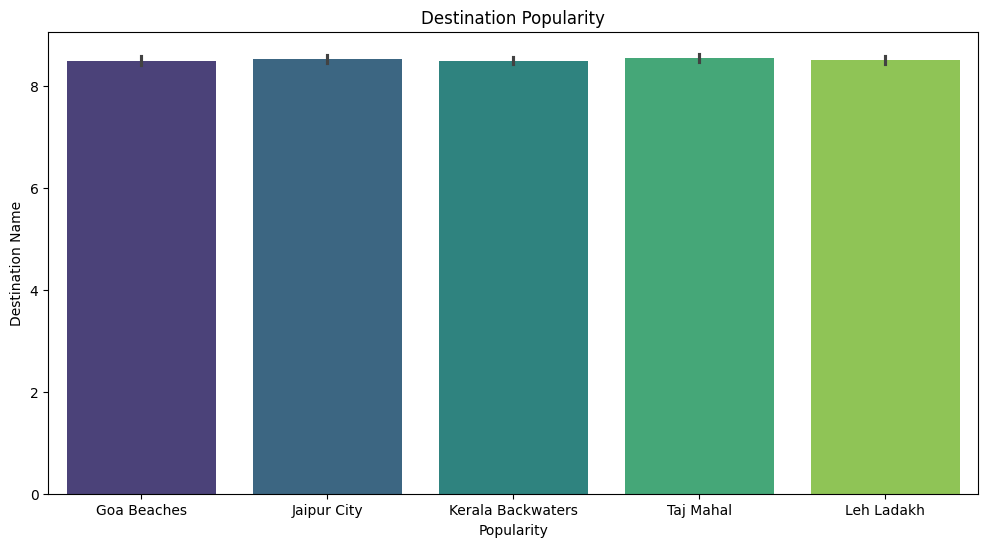

In [27]:
#destination popularity
plt.figure(figsize=(12,6))
sns.barplot(y='Popularity',x='Name',data=destinations_df.sort_values(by='Popularity',ascending=False),palette='viridis')
plt.xlabel('Popularity')
plt.ylabel('Destination Name')
plt.title('Destination Popularity')
plt.show()

<ipython-input-34-32a50bb08658>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Type',data=destinations_df,order=destinations_df['Type'].value_counts().index,palette='viridis')


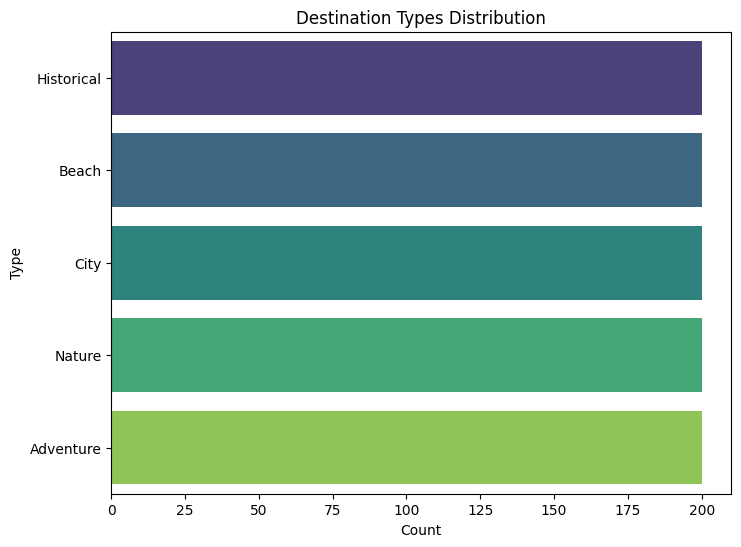

In [34]:
#destination types distribution
plt.figure(figsize=(8,6))
sns.countplot(y='Type',data=destinations_df,order=destinations_df['Type'].value_counts().index,palette='viridis')
plt.ylabel('Type')
plt.xlabel('Count')
plt.title('Destination Types Distribution')
plt.show()
#

<ipython-input-35-2e7088160a8f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='BestTimeToVisit', data=destinations_df, order=destinations_df['BestTimeToVisit'].value_counts().index, palette='mako')


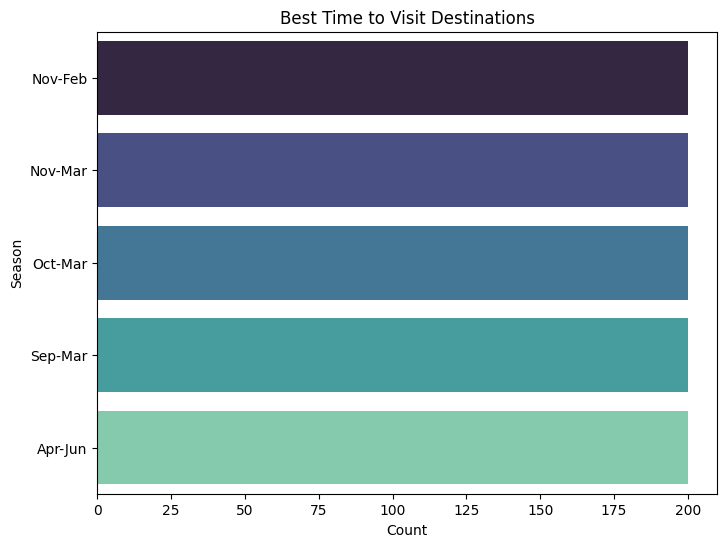

In [35]:
# 3. Best Time to Visit Distribution
plt.figure(figsize=(8, 6))
sns.countplot(y='BestTimeToVisit', data=destinations_df, order=destinations_df['BestTimeToVisit'].value_counts().index, palette='mako')
plt.title('Best Time to Visit Destinations')
plt.xlabel('Count')
plt.ylabel('Season')
plt.show()

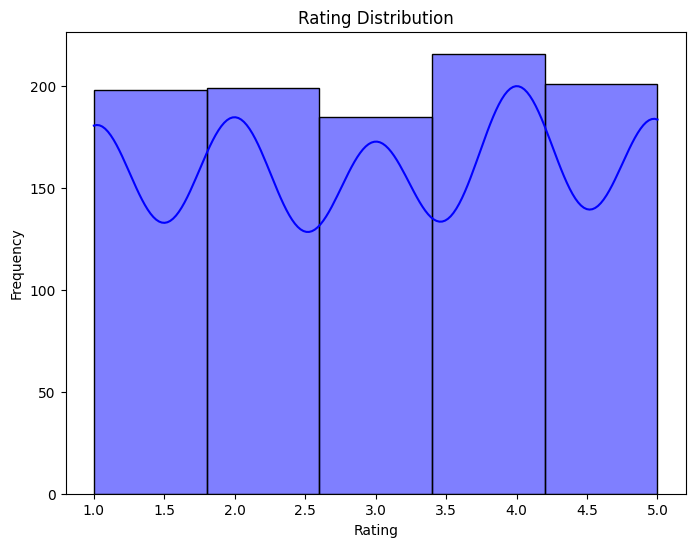

In [36]:


# 4. Ratings Distribution
plt.figure(figsize=(8, 6))
sns.histplot(reviews_df['Rating'], bins=5, kde=True, color='blue')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

#Prepare Destination feature

In [38]:
#text_based feature for the destinations
df['features']=df['Type']+' '+df['State']+ ' '+df['BestTimeToVisit'] +'  '+df['Preferences']
df

,ReviewID,DestinationID_x,UserID,Rating,ReviewText,Name_x,State,Type,Popularity,BestTimeToVisit,...,DestinationID_y,VisitDate,ExperienceRating,Name_y,Email,Preferences,Gender,NumberOfAdults,NumberOfChildren,features
0,1,178,327,2,Incredible monument!,Jaipur City,Rajasthan,City,8.544352,Oct-Mar,...,175,2024-01-01,3,Pooja,pooja@example.com,"City, Historical",Female,1,1,"City Rajasthan Oct-Mar City, Historical"
1,2,411,783,1,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,8.284127,Nov-Feb,...,894,2024-03-20,2,Karan,karan@example.com,"City, Historical",Male,1,1,"Historical Uttar Pradesh Nov-Feb City, Histor..."
2,4,358,959,3,Incredible monument!,Jaipur City,Rajasthan,City,7.738761,Oct-Mar,...,660,2024-02-15,4,Ritvik,ritvik@example.com,"Nature, Adventure",Male,1,1,"City Rajasthan Oct-Mar Nature, Adventure"
3,5,989,353,2,Loved the beaches!,Kerala Backwaters,Kerala,Nature,8.208088,Sep-Mar,...,894,2024-01-01,5,Isha,isha@example.com,"Nature, Adventure",Female,2,0,"Nature Kerala Sep-Mar Nature, Adventure"
4,6,473,408,4,A historical wonder,Jaipur City,Rajasthan,City,8.138558,Oct-Mar,...,403,2024-01-01,2,Ishaan,ishaan@example.com,"City, Historical",Male,2,0,"City Rajasthan Oct-Mar City, Historical"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,...,131,2024-03-20,1,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0,"Historical Uttar Pradesh Nov-Feb Beaches, His..."
989,991,701,850,3,Incredible monument!,Taj Mahal,Uttar Pradesh,Historical,8.814029,Nov-Feb,...,761,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,0,"Historical Uttar Pradesh Nov-Feb Beaches, His..."
990,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,...,113,2024-01-01,2,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2,"Historical Uttar Pradesh Nov-Feb Beaches, His..."
991,995,231,346,5,Loved the beaches!,Taj Mahal,Uttar Pradesh,Historical,7.788256,Nov-Feb,...,128,2024-01-01,4,Hitesh,hitesh@example.com,"Beaches, Historical",Male,2,2,"Historical Uttar Pradesh Nov-Feb Beaches, His..."


In [45]:
#TF-IDF vectorizer to create feature vectors for destinations
vectorizer=TfidfVectorizer(stop_words='english')
destination_features=vectorizer.fit_transform(df['features'])
#compute cosine similarity between destinations
cosine_sim=cosine_similarity(destination_features,destination_features)

#function recommendations

 """
    Recommends top 5 destinations for a given user based on similarity scores.
    Args:
   1. - user_id: ID of the user.
   2. - userhistory_df: User history DataFrame containing 'UserID' and 'DestinationID'.
   3.  - destinations_df: Destinations DataFrame containing destination details.
   4. - cosine_sim: Cosine similarity matrix for destinations.
    Returns:
   5. - DataFrame with recommended destinations and their details.
    """



In [50]:
#define function
def recommend_destinations(user_id,userhistory_df,destinations_df,cosine_sim):
  #get the destinations the user has visited
  visited_destinations=userhistory_df[userhistory_df['UserID']==user_id]['DestinationID'].values

  #calculate similarity scores for visited destinations
  similar_scores=np.sum(cosine_sim[visited_destinations-1],axis=0)

  #recommend the top 5 destinations the user hasn't visited yet
  recommended_destinations_idx=np.argsort(similar_scores)[::-1]

  recommendations=[]
  for idx in recommended_destinations_idx:
    if destinations_df.iloc[idx]['DestinationID'] not in visited_destinations:
      #appeend detailed information for each recommendation
      recommendations.append(destinations_df.iloc[idx][[
          'DestinationID','Name','Type','State','BestTimeToVisit','Popularity'
      ]].to_dict())
    if len(recommendations)>=5:
      break
  #convert recommendations to a seperate dataframe
  return pd.DataFrame(recommendations)
recommended_destinations=recommend_destinations(1,userhistory_df, destinations_df,cosine_sim)
recommended_destinations

,DestinationID,Name,Type,State,BestTimeToVisit,Popularity
0,41,Taj Mahal,Historical,Uttar Pradesh,Nov-Feb,9.452056
1,64,Kerala Backwaters,Nature,Kerala,Sep-Mar,7.995382
2,42,Goa Beaches,Beach,Goa,Nov-Mar,8.854828
3,62,Goa Beaches,Beach,Goa,Nov-Mar,9.379787
4,63,Jaipur City,City,Rajasthan,Oct-Mar,9.202094


In [51]:
user_item_matrix = userhistory_df.pivot(index='UserID', columns='DestinationID', values='ExperienceRating')
user_item_matrix = user_item_matrix.fillna(0)
user_item_matrix

DestinationID,2,3,4,5,6,7,8,9,10,11,...,987,988,990,991,993,994,996,997,998,1000
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
user_similarity = cosine_similarity(user_item_matrix)
user_similarity

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [53]:
def collaborative_recommend(user_id, user_similarity, user_item_matrix, destinations_df):
    """
    Recommends destinations based on collaborative filtering.

    Args:
    - user_id: ID of the user for whom recommendations are to be made.
    - user_similarity: Cosine similarity matrix for users.
    - user_item_matrix: User-item interaction matrix (e.g., ratings or preferences).
    - destinations_df: DataFrame containing destination details.

    Returns:
    - DataFrame with recommended destinations and their details.
    """
    # Find similar users
    similar_users = user_similarity[user_id - 1]

    # Get the top 5 most similar users
    similar_users_idx = np.argsort(similar_users)[::-1][1:6]

    # Get the destinations liked by similar users
    similar_user_ratings = user_item_matrix.iloc[similar_users_idx].mean(axis=0)

    # Recommend the top 5 destinations
    recommended_destinations_ids = similar_user_ratings.sort_values(ascending=False).head(5).index

    # Filter the destinations DataFrame to include detailed information
    recommendations = destinations_df[destinations_df['DestinationID'].isin(recommended_destinations_ids)][[
        'DestinationID', 'Name', 'State', 'Type', 'Popularity', 'BestTimeToVisit'
    ]]

    return recommendations

# Example: Collaborative recommendations for user 1
collaborative_recommendations = collaborative_recommend(10, user_similarity, user_item_matrix, destinations_df)

# Display recommendations
collaborative_recommendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
346,347,Goa Beaches,Goa,Beach,7.920960,Nov-Mar
435,436,Taj Mahal,Uttar Pradesh,Historical,7.728114,Nov-Feb
519,520,Leh Ladakh,Jammu and Kashmir,Adventure,8.521876,Apr-Jun
684,685,Leh Ladakh,Jammu and Kashmir,Adventure,7.598827,Apr-Jun
784,785,Leh Ladakh,Jammu and Kashmir,Adventure,9.366933,Apr-Jun


In [54]:
collaborative_recommendations = collaborative_recommend(11, user_similarity, user_item_matrix, destinations_df)

# Display recommendations
collaborative_recommendations

,DestinationID,Name,State,Type,Popularity,BestTimeToVisit
300,301,Taj Mahal,Uttar Pradesh,Historical,8.634309,Nov-Feb
346,347,Goa Beaches,Goa,Beach,7.920960,Nov-Mar
367,368,Jaipur City,Rajasthan,City,8.008252,Oct-Mar
435,436,Taj Mahal,Uttar Pradesh,Historical,7.728114,Nov-Feb
969,970,Leh Ladakh,Jammu and Kashmir,Adventure,9.013101,Apr-Jun


In [55]:
data=df.copy()

In [56]:
# Predicting popularity
features = ['Name_x', 'State', 'Type', 'BestTimeToVisit', 'Preferences', 'Gender', 'NumberOfAdults', 'NumberOfChildren']
target = 'Popularity'

In [57]:
data[features]

,Name_x,State,Type,BestTimeToVisit,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,Jaipur City,Rajasthan,City,Oct-Mar,"City, Historical",Female,1,1
1,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"City, Historical",Male,1,1
2,Jaipur City,Rajasthan,City,Oct-Mar,"Nature, Adventure",Male,1,1
3,Kerala Backwaters,Kerala,Nature,Sep-Mar,"Nature, Adventure",Female,2,0
4,Jaipur City,Rajasthan,City,Oct-Mar,"City, Historical",Male,2,0
...,...,...,...,...,...,...,...,...
988,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,0
989,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,0
990,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,2
991,Taj Mahal,Uttar Pradesh,Historical,Nov-Feb,"Beaches, Historical",Male,2,2


In [58]:
for col in features:
      print(col)

Name_x
State
Type
BestTimeToVisit
Preferences
Gender
NumberOfAdults
NumberOfChildren


In [59]:
label_encoders = {}
for col in features:
    if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
        label_encoders[col] = le

In [60]:
data[features]

,Name_x,State,Type,BestTimeToVisit,Preferences,Gender,NumberOfAdults,NumberOfChildren
0,1,3,2,3,1,0,1,1
1,4,4,3,1,1,1,1,1
2,1,3,2,3,2,1,1,1
3,2,2,4,4,2,0,2,0
4,1,3,2,3,1,1,2,0
...,...,...,...,...,...,...,...,...
988,4,4,3,1,0,1,2,0
989,4,4,3,1,0,1,2,0
990,4,4,3,1,0,1,2,2
991,4,4,3,1,0,1,2,2


In [63]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#Train Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

#Evaluation
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")

Mean Squared Error: 0.30
R² Score: 0.07


In [67]:
def recommend_destinations(user_input, model, label_encoders, features, data):
    # Encode user input
    encoded_input = {}
    for feature in features:
        if feature in label_encoders:
            encoded_input[feature] = label_encoders[feature].transform([user_input[feature]])[0]
        else:
            encoded_input[feature] = user_input[feature]

    # Convert to DataFrame
    input_df = pd.DataFrame([encoded_input])

    # Predict popularity
    predicted_popularity = model.predict(input_df)[0]

    return predicted_popularity


# Example user input
user_input = {
    'Name_x': 'Jaipur City',
    'Type': 'City',
    'State': 'Rajasthan',
    'BestTimeToVisit': 'Oct-Mar',  # This might be an unseen label
    'Preferences': 'City, Historical',
    'Gender': 'Female',
    'NumberOfAdults': 2,
    'NumberOfChildren': 1,
}

# Make a prediction
predicted_popularity = recommend_destinations(user_input, model, label_encoders, features, data)

# Print the predicted popularity and the recommended destination details
print(f"Predicted Popularity Score: {predicted_popularity:.2f}")

Predicted Popularity Score: 7.88


In [72]:
import pickle


In [73]:
pickle.dump(model, open("model.pkl",'wb'))
pickle.dump(label_encoders, open("label_encoders.pkl",'wb'))